In [363]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
%matplotlib inline
from pandas.api.types import CategoricalDtype

# City of Miami 311 Service Requests Since 2015

Data Source: https://datahub-miamigis.opendata.arcgis.com/datasets/6acb8f4ed62c4d248e0cd244f761ca25_0/about

In [3]:
df = pd.read_csv("City_of_Miami_311_Service_Requests_Since_2015.csv")
df

,X,Y,ticket_id,issue_type,issue_Description,case_owner,street_address,city,state,zip_code,...,longitude,coordinates,method_received,goal_days,actual_completed_days,Property_Folio_Number,Unit_Number,Ticket_Priority,OverDueFlag,ObjectId
0,-80.220007,25.798775,19-10378257,COMFCUIN,FIRE CU INSPECTION REQUEST,Fire-Rescue,1431 NW 23RD ST,Miami,Florida,33142,...,-80.220007,1431 NW 23RD ST Miami Florida 33142,PHONE,5,0,1.312604e+11,NaN,STANDARD,0,1
1,-80.220007,25.798775,19-10378265,COMCECUI,CODE ENFORCEMENT CU INSPECTION REQUEST,Code Compliance,1431 NW 23RD ST,Miami,Florida,33142,...,-80.220007,1431 NW 23RD ST Miami Florida 33142,PHONE,3,5,1.312604e+11,NaN,STANDARD,1,2
2,-80.216448,25.836187,19-10378281,COMSWCB,SOLID WASTE MISCELLANEOUS REQUESTS,Solid Waste,1175 NW 67TH ST,Miami,Florida,33150,...,-80.216448,1175 NW 67TH ST Miami Florida 33150,PHONE,5,3,1.311407e+11,NaN,STANDARD,0,3
3,-80.279132,25.771158,19-10378294,COMSWKDM,SIDEWALK DAMAGE,Resilience & Public Works,5830 NW 7 Ct,Miami,Florida,33126,...,-80.279132,5830 NW 7 Ct Miami Florida 33126,PHONE,120,370,NaN,NaN,STANDARD,1,4
4,-80.224080,25.834424,19-10378301,GARBAGE1,GARBAGE - MISSED,Solid Waste,1601 NW 65TH ST,Miami,Florida,33147,...,-80.224080,1601 NW 65TH ST Miami Florida 33147,PHONE,1,3,1.311403e+11,NaN,URGENT,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127321,-80.191999,25.813719,22-10440317,COMCECUI,CODE ENFORCEMENT CU INSPECTION REQUEST,Code Compliance,175 NE 40TH ST,Miami,Florida,33137,...,-80.191999,175 NE 40TH ST Miami Florida 33137,EMAIL,3,3,1.312405e+11,NaN,STANDARD,0,127322
127322,-80.191999,25.813719,22-10440322,COMFCUIN,FIRE CU INSPECTION REQUEST,Fire-Rescue,175 NE 40TH ST,Miami,Florida,33137,...,-80.191999,175 NE 40TH ST Miami Florida 33137,EMAIL,5,1,1.312405e+11,NaN,STANDARD,0,127323
127323,-80.184561,25.816408,22-10440359,COMSWSER,SOLID WASTE RESIDENTIAL NEW SERVICE / ACCOUNT ...,Solid Waste,627 SABAL PALM RD,Miami,Florida,33137,...,-80.184561,627 SABAL PALM RD Miami Florida 33137,PHONE,10,3,1.321901e+11,NaN,STANDARD,0,127324
127324,-80.187160,25.791375,22-10440382,COMTRACO,MIAMI TROLLEY - ON DEMAND TRANSPORTATION SERVI...,Resilience & Public Works,1700 N BAYSHORE DR,Miami,Florida,33132,...,-80.187160,1700 N BAYSHORE DR Miami Florida 33132,PHONE,1,1,1.413704e+11,NaN,STANDARD,0,127325


In [4]:
df.head()

,X,Y,ticket_id,issue_type,issue_Description,case_owner,street_address,city,state,zip_code,...,longitude,coordinates,method_received,goal_days,actual_completed_days,Property_Folio_Number,Unit_Number,Ticket_Priority,OverDueFlag,ObjectId
0,-80.220007,25.798775,19-10378257,COMFCUIN,FIRE CU INSPECTION REQUEST,Fire-Rescue,1431 NW 23RD ST,Miami,Florida,33142,...,-80.220007,1431 NW 23RD ST Miami Florida 33142,PHONE,5,0,1.312604e+11,NaN,STANDARD,0,1
1,-80.220007,25.798775,19-10378265,COMCECUI,CODE ENFORCEMENT CU INSPECTION REQUEST,Code Compliance,1431 NW 23RD ST,Miami,Florida,33142,...,-80.220007,1431 NW 23RD ST Miami Florida 33142,PHONE,3,5,1.312604e+11,NaN,STANDARD,1,2
2,-80.216448,25.836187,19-10378281,COMSWCB,SOLID WASTE MISCELLANEOUS REQUESTS,Solid Waste,1175 NW 67TH ST,Miami,Florida,33150,...,-80.216448,1175 NW 67TH ST Miami Florida 33150,PHONE,5,3,1.311407e+11,NaN,STANDARD,0,3
3,-80.279132,25.771158,19-10378294,COMSWKDM,SIDEWALK DAMAGE,Resilience & Public Works,5830 NW 7 Ct,Miami,Florida,33126,...,-80.279132,5830 NW 7 Ct Miami Florida 33126,PHONE,120,370,NaN,NaN,STANDARD,1,4
4,-80.224080,25.834424,19-10378301,GARBAGE1,GARBAGE - MISSED,Solid Waste,1601 NW 65TH ST,Miami,Florida,33147,...,-80.224080,1601 NW 65TH ST Miami Florida 33147,PHONE,1,3,1.311403e+11,NaN,URGENT,1,5


In [4]:
# Dimension of dataset
df.shape

(127326, 29)

In [5]:
df.columns

Index(['X', 'Y', 'ticket_id', 'issue_type', 'issue_Description', 'case_owner',
       'street_address', 'city', 'state', 'zip_code', 'District',
       'created_year_month', 'ticket_created_date_time',
       'ticket_last_updated_date_time', 'ticket_closed_date_time',
       'ticket_status', 'x_coordinate', 'y_coordinate', 'latitude',
       'longitude', 'coordinates', 'method_received', 'goal_days',
       'actual_completed_days', 'Property_Folio_Number', 'Unit_Number',
       'Ticket_Priority', 'OverDueFlag', 'ObjectId'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127326 entries, 0 to 127325
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   X                              127129 non-null  float64
 1   Y                              127129 non-null  float64
 2   ticket_id                      127326 non-null  object 
 3   issue_type                     127326 non-null  object 
 4   issue_Description              127326 non-null  object 
 5   case_owner                     127326 non-null  object 
 6   street_address                 127326 non-null  object 
 7   city                           127326 non-null  object 
 8   state                          127275 non-null  object 
 9   zip_code                       127326 non-null  int64  
 10  District                       127326 non-null  int64  
 11  created_year_month             127326 non-null  int64  
 12  ticket_created_date_time      

In [9]:
df.describe()

,X,Y,zip_code,District,created_year_month,x_coordinate,y_coordinate,latitude,longitude,goal_days,actual_completed_days,Property_Folio_Number,OverDueFlag,ObjectId
count,127129.000000,127129.000000,127326.000000,127326.000000,127326.000000,127129.000000,127129.000000,127129.000000,127129.000000,127326.000000,127326.000000,1.101640e+05,127326.000000,127326.000000
mean,-80.226576,25.782985,33120.529978,3.110488,70518.488604,910671.187611,527654.388369,25.782985,-80.226576,14.818882,31.529931,1.510991e+11,0.327985,63663.500000
std,0.030761,0.034157,681.067869,1.415056,81341.702782,10089.500661,12469.471414,0.034157,0.030761,22.772118,102.714577,2.139626e+11,0.469481,36755.994525
min,-80.536739,25.427765,0.000000,0.000000,20201.000000,809055.377000,397982.189000,25.427765,-80.536739,1.000000,0.000000,1.010000e+11,0.000000,1.000000
25%,-80.245239,25.761634,33127.000000,2.000000,20213.000000,904580.437000,519810.562000,25.761634,-80.245239,3.000000,2.000000,1.312604e+11,0.000000,31832.250000
50%,-80.223645,25.775063,33134.000000,3.000000,20223.000000,911635.687000,524749.061000,25.775063,-80.223645,7.000000,4.000000,1.400102e+11,0.000000,63663.500000
75%,-80.202723,25.807946,33142.000000,4.000000,201910.000000,918485.498000,536886.311000,25.807946,-80.202723,10.000000,9.000000,1.411006e+11,1.000000,95494.750000
max,-80.120871,25.973425,33196.000000,5.000000,202211.000000,945280.997000,596940.831000,25.973425,-80.120871,180.000000,824.000000,3.660160e+12,1.000000,127326.000000


In [14]:
df.loc[:,['X','Y','latitude','longitude','x_coordinate','y_coordinate']]

,X,Y,latitude,longitude,x_coordinate,y_coordinate
0,-80.220007,25.798775,25.798775,-80.220007,912795.219,533315.533
1,-80.220007,25.798775,25.798775,-80.220007,912795.219,533315.533
2,-80.216448,25.836187,25.836187,-80.216448,913885.304,546920.608
3,-80.279132,25.771158,25.771158,-80.279132,893396.623,523166.780
4,-80.224080,25.834424,25.834424,-80.224080,911378.811,546264.872
...,...,...,...,...,...,...
127321,-80.191999,25.813719,25.813719,-80.191999,921977.437,538802.623
127322,-80.191999,25.813719,25.813719,-80.191999,921977.437,538802.623
127323,-80.184561,25.816408,25.816408,-80.184561,924418.387,539795.281
127324,-80.187160,25.791375,25.791375,-80.187160,923619.498,530691.366


# Data  Cleaning

### 1. Drop irrelevant Columns

In [15]:
df.drop(['X','Y'], axis=1, inplace=True)

Dropping X and Y as they are the same as columns - Longitude and Latitude

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127326 entries, 0 to 127325
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ticket_id                      127326 non-null  object 
 1   issue_type                     127326 non-null  object 
 2   issue_Description              127326 non-null  object 
 3   case_owner                     127326 non-null  object 
 4   street_address                 127326 non-null  object 
 5   city                           127326 non-null  object 
 6   state                          127275 non-null  object 
 7   zip_code                       127326 non-null  int64  
 8   District                       127326 non-null  int64  
 9   created_year_month             127326 non-null  int64  
 10  ticket_created_date_time       127326 non-null  object 
 11  ticket_last_updated_date_time  127326 non-null  object 
 12  ticket_closed_date_time       

In [28]:
df.state.unique()

array(['Florida', nan], dtype=object)

In [29]:
df.state.isnull().sum()

51

In [30]:
df.drop(['state'],axis=1, inplace=True)

Since all the tickets belong to the state 'Florida', removing this unecessary column.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127326 entries, 0 to 127325
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ticket_id                      127326 non-null  object 
 1   issue_type                     127326 non-null  object 
 2   issue_Description              127326 non-null  object 
 3   case_owner                     127326 non-null  object 
 4   street_address                 127326 non-null  object 
 5   city                           127326 non-null  object 
 6   zip_code                       127326 non-null  int64  
 7   District                       127326 non-null  int64  
 8   created_year_month             127326 non-null  int64  
 9   ticket_created_date_time       127326 non-null  object 
 10  ticket_last_updated_date_time  127326 non-null  object 
 11  ticket_closed_date_time        122898 non-null  object 
 12  ticket_status                 

In [32]:
df.coordinates

0             1431 NW 23RD ST Miami Florida 33142
1             1431 NW 23RD ST Miami Florida 33142
2             1175 NW 67TH ST Miami Florida 33150
3               5830 NW 7 Ct  Miami Florida 33126
4             1601 NW 65TH ST Miami Florida 33147
                           ...                   
127321         175 NE 40TH ST Miami Florida 33137
127322         175 NE 40TH ST Miami Florida 33137
127323      627 SABAL PALM RD Miami Florida 33137
127324     1700 N BAYSHORE DR Miami Florida 33132
127325    1250 SW FLAGLER TER Miami Florida 33135
Name: coordinates, Length: 127326, dtype: object

In [33]:
df.loc[:,['coordinates','street_address','city','zip_code']]

,coordinates,street_address,city,zip_code
0,1431 NW 23RD ST Miami Florida 33142,1431 NW 23RD ST,Miami,33142
1,1431 NW 23RD ST Miami Florida 33142,1431 NW 23RD ST,Miami,33142
2,1175 NW 67TH ST Miami Florida 33150,1175 NW 67TH ST,Miami,33150
3,5830 NW 7 Ct Miami Florida 33126,5830 NW 7 Ct,Miami,33126
4,1601 NW 65TH ST Miami Florida 33147,1601 NW 65TH ST,Miami,33147
...,...,...,...,...
127321,175 NE 40TH ST Miami Florida 33137,175 NE 40TH ST,Miami,33137
127322,175 NE 40TH ST Miami Florida 33137,175 NE 40TH ST,Miami,33137
127323,627 SABAL PALM RD Miami Florida 33137,627 SABAL PALM RD,Miami,33137
127324,1700 N BAYSHORE DR Miami Florida 33132,1700 N BAYSHORE DR,Miami,33132


The column 'coordinates' includes the full address of the ticket. Since we already have that column split into specific columns such as - street address, city and zipcode, this column becomes unecessary. Hence removing.

In [34]:
df.drop(['coordinates'],axis=1, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127326 entries, 0 to 127325
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ticket_id                      127326 non-null  object 
 1   issue_type                     127326 non-null  object 
 2   issue_Description              127326 non-null  object 
 3   case_owner                     127326 non-null  object 
 4   street_address                 127326 non-null  object 
 5   city                           127326 non-null  object 
 6   zip_code                       127326 non-null  int64  
 7   District                       127326 non-null  int64  
 8   created_year_month             127326 non-null  int64  
 9   ticket_created_date_time       127326 non-null  object 
 10  ticket_last_updated_date_time  127326 non-null  object 
 11  ticket_closed_date_time        122898 non-null  object 
 12  ticket_status                 

In [37]:
df.loc[:,['created_year_month','ticket_created_date_time']]

,created_year_month,ticket_created_date_time
0,201910,2019/10/03 10:50:51+00
1,201910,2019/10/03 10:51:30+00
2,201910,2019/10/03 10:56:05+00
3,201910,2019/10/03 10:59:02+00
4,201910,2019/10/03 11:00:03+00
...,...,...
127321,202211,2022/11/23 09:26:28.505+00
127322,202211,2022/11/23 09:28:30.640+00
127323,202211,2022/11/23 09:37:14.526+00
127324,202211,2022/11/23 09:47:02.340+00


In [72]:
# Removing extra irrelevant columns

df.drop(['Property_Folio_Number','ObjectId','created_year_month','Unit_Number'],axis=1, inplace=True)

KeyError: ignored

In [42]:
df.drop(['x_coordinate','y_coordinate'],axis=1, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127326 entries, 0 to 127325
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ticket_id                      127326 non-null  object 
 1   issue_type                     127326 non-null  object 
 2   issue_Description              127326 non-null  object 
 3   case_owner                     127326 non-null  object 
 4   street_address                 127326 non-null  object 
 5   city                           127326 non-null  object 
 6   zip_code                       127326 non-null  int64  
 7   District                       127326 non-null  int64  
 8   ticket_created_date_time       127326 non-null  object 
 9   ticket_last_updated_date_time  127326 non-null  object 
 10  ticket_closed_date_time        122898 non-null  object 
 11  ticket_status                  127326 non-null  object 
 12  latitude                      

### 2. Check Missing Values

In [45]:
# Check for Null Values

df.isnull().values.any()

True

In [46]:
df.isna().sum()

ticket_id                           0
issue_type                          0
issue_Description                   0
case_owner                          0
street_address                      0
city                                0
zip_code                            0
District                            0
ticket_created_date_time            0
ticket_last_updated_date_time       0
ticket_closed_date_time          4428
ticket_status                       0
latitude                          197
longitude                         197
method_received                     0
goal_days                           0
actual_completed_days               0
Ticket_Priority                     0
OverDueFlag                         0
dtype: int64

In [51]:
# Treating Null Values

df1 = df.dropna()

Since there are 127326 entries, dropping the above null values won't affect the overall dataset.

In [52]:
df1.isna().sum()

ticket_id                        0
issue_type                       0
issue_Description                0
case_owner                       0
street_address                   0
city                             0
zip_code                         0
District                         0
ticket_created_date_time         0
ticket_last_updated_date_time    0
ticket_closed_date_time          0
ticket_status                    0
latitude                         0
longitude                        0
method_received                  0
goal_days                        0
actual_completed_days            0
Ticket_Priority                  0
OverDueFlag                      0
dtype: int64

### 3. Check for duplicates

In [58]:
# Ticket_id is a unique key

df1.ticket_id.duplicated().sum()


0

### 4. Data Transformation: Fixing data types

In [59]:
df1.ticket_created_date_time = df1['ticket_created_date_time'].astype('datetime64[ns]')

df1.ticket_last_updated_date_time = df1['ticket_last_updated_date_time'].astype('datetime64[ns]')

df1.ticket_closed_date_time = df1['ticket_closed_date_time'].astype('datetime64[ns]')

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [61]:
df1.dtypes

ticket_id                                object
issue_type                               object
issue_Description                        object
case_owner                               object
street_address                           object
city                                     object
zip_code                                  int64
District                                  int64
ticket_created_date_time         datetime64[ns]
ticket_last_updated_date_time    datetime64[ns]
ticket_closed_date_time          datetime64[ns]
ticket_status                            object
latitude                                float64
longitude                               float64
method_received                          object
goal_days                                 int64
actual_completed_days                     int64
Ticket_Priority                          object
OverDueFlag                               int64
dtype: object

### 5. Check for invalid data

In [62]:
# Checking for negative values

len(df1.loc[df1['actual_completed_days'] < 0])

0

In [63]:
len(df1.loc[df1['goal_days'] < 0])

0

In [99]:
# Checking for zero values

len(df1.loc[df1['goal_days'] == 0])

0

### 6. Split Columns

In [66]:
df1['ticket_created_date_time']

0        2019-10-03 10:50:51.000
1        2019-10-03 10:51:30.000
2        2019-10-03 10:56:05.000
3        2019-10-03 10:59:02.000
4        2019-10-03 11:00:03.000
                   ...          
127309   2022-11-23 08:42:13.535
127313   2022-11-23 08:53:17.379
127315   2022-11-23 08:56:18.564
127316   2022-11-23 08:59:55.496
127322   2022-11-23 09:28:30.640
Name: ticket_created_date_time, Length: 122766, dtype: datetime64[ns]

In [68]:
# Create year, month, week, day and hour columns from ticket_created_date_time

df1['ticket_created_date_time'] = pd.to_datetime(df1['ticket_created_date_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df1['year'] = df1['ticket_created_date_time'].dt.year

df1['month'] = df1['ticket_created_date_time'].dt.month_name()

df1['day_of_week'] = df1['ticket_created_date_time'].dt.day_name()

df1['hour'] = df1['ticket_created_date_time'].dt.hour

df1.head(5)



<ipython-input-68-a9f10191e1bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ticket_created_date_time'] = pd.to_datetime(df1['ticket_created_date_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
<ipython-input-68-a9f10191e1bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = df1['ticket_created_date_time'].dt.year
<ipython-input-68-a9f10191e1bb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,ticket_id,issue_type,issue_Description,case_owner,street_address,city,zip_code,District,ticket_created_date_time,ticket_last_updated_date_time,...,longitude,method_received,goal_days,actual_completed_days,Ticket_Priority,OverDueFlag,year,month,day_of_week,hour
0,19-10378257,COMFCUIN,FIRE CU INSPECTION REQUEST,Fire-Rescue,1431 NW 23RD ST,Miami,33142,1,2019-10-03 10:50:51,2019-10-03 10:50:51.000,...,-80.220007,PHONE,5,0,STANDARD,0,2019,October,Thursday,10
1,19-10378265,COMCECUI,CODE ENFORCEMENT CU INSPECTION REQUEST,Code Compliance,1431 NW 23RD ST,Miami,33142,1,2019-10-03 10:51:30,2019-10-09 17:15:06.347,...,-80.220007,PHONE,3,5,STANDARD,1,2019,October,Thursday,10
2,19-10378281,COMSWCB,SOLID WASTE MISCELLANEOUS REQUESTS,Solid Waste,1175 NW 67TH ST,Miami,33150,5,2019-10-03 10:56:05,2019-10-08 08:24:29.458,...,-80.216448,PHONE,5,3,STANDARD,0,2019,October,Thursday,10
3,19-10378294,COMSWKDM,SIDEWALK DAMAGE,Resilience & Public Works,5830 NW 7 Ct,Miami,33126,4,2019-10-03 10:59:02,2021-03-03 11:10:02.479,...,-80.279132,PHONE,120,370,STANDARD,1,2019,October,Thursday,10
4,19-10378301,GARBAGE1,GARBAGE - MISSED,Solid Waste,1601 NW 65TH ST,Miami,33147,5,2019-10-03 11:00:03,2019-10-07 15:54:47.238,...,-80.224080,PHONE,1,3,URGENT,1,2019,October,Thursday,11


In [69]:
df1.dtypes

ticket_id                                object
issue_type                               object
issue_Description                        object
case_owner                               object
street_address                           object
city                                     object
zip_code                                  int64
District                                  int64
ticket_created_date_time         datetime64[ns]
ticket_last_updated_date_time    datetime64[ns]
ticket_closed_date_time          datetime64[ns]
ticket_status                            object
latitude                                float64
longitude                               float64
method_received                          object
goal_days                                 int64
actual_completed_days                     int64
Ticket_Priority                          object
OverDueFlag                               int64
year                                      int64
month                                   

In [73]:
# Changing day_of_week to Category datatype

w = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df1['day_of_week'] = df1['day_of_week'].astype(CategoricalDtype(categories=w, ordered=True))

<ipython-input-73-65fcedba2746>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day_of_week'] = df1['day_of_week'].astype(CategoricalDtype(categories=catss, ordered=True))


In [74]:
# Change month to Category datatype

m = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1['month'] = df1['month'].astype(CategoricalDtype(categories=m, ordered=True))

<ipython-input-74-b8783a7d2235>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['month'].astype(CategoricalDtype(categories=mnth, ordered=True))


In [75]:
# Save clean version

df1.to_csv('cleaned_miami_data.csv', index=False)

# Data Analysis



In [114]:
# Total number of tickets

df1['ticket_id'].count().sum()

122766

After cleaning and removing dirty data, the total number of tickets are 122766.




In [77]:
# Total number of tickets as per issue_type

df1.groupby(['issue_type']).agg(num_of_tickets =('issue_type', 'count'))

,num_of_tickets
issue_type,
BEEWASP,40
CAVESINK,309
COMBIC,6
COMBUUST,534
COMCANAL,40
...,...
TREEBLOT,752
TREEDOWN,505
TREEFELL,14


In [78]:
# Total number of tickets as per case_owner

df1.groupby(['case_owner']).agg(num_of_tickets =('case_owner', 'count'))

,num_of_tickets
case_owner,
Building,1220
Code Compliance,16990
Fire-Rescue,6066
NET,1672
Police,28
Resilience & Public Works,24056
Solid Waste,66157
Zoning,6577


Most tickets are owned by Solid Waste case owners.

In [79]:
# Total number of tickets as per ticket priority

df1.groupby(['Ticket_Priority']).agg(num_of_tickets =('Ticket_Priority', 'count'))

,num_of_tickets
Ticket_Priority,
COMMSNR,2685
EMERGNCY,2103
HURRACT,7
MAYOR,12
MH,11
STANDARD,109457
URGENT,8491


Standard tickets are most common.

In [80]:
# Total number of tickets by methods received

df1.groupby(['method_received']).agg(num_of_tickets =('method_received', 'count'))

,num_of_tickets
method_received,
ANDROID,1598
APPEOCA,59
COMMMEET,2
EMAIL,1957
FAX,2
INHOUSE,44
IPHONE,7703
MAIL,9
MAYOFF,8


It comes to notice that Phone, Iphone, Android...mean the same thing. Although 0 phone can also mean - landline, not a mobile phone. Can't do anything about it.

In [81]:
# Number of tickets as per the day of the Week

df1.groupby(['day_of_week']).agg({'ticket_id':'count'}).sort_values(by='ticket_id', ascending = False).rename(columns={'ticket_id':'number_of_rides'})

,number_of_rides
day_of_week,
Tuesday,26619
Thursday,23099
Wednesday,22927
Monday,22030
Friday,21984
Saturday,4482
Sunday,1625


So, Tuesdays are the busiest days. Sundays least busy.

In [84]:
# Number of tickets as per Ticket Priority and Days of the week
df1.groupby(['day_of_week', 'Ticket_Priority']).agg(number_of_rides=('ticket_id', 'count'))

number_of_rides
day_of_week Ticket_Priority                 
Monday      COMMSNR                      483
            EMERGNCY                     487
            HURRACT                        4
            MAYOR                          6
            MH                             2
            STANDARD                   19679
            URGENT                      1369
Tuesday     COMMSNR                      549
            EMERGNCY                     351
            HURRACT                        1
            MAYOR                          2
            MH                             4
            STANDARD                   23417
            URGENT                      2295
Wednesday   COMMSNR                      527
            EMERGNCY                     395
            HURRACT                        1
            MAYOR                          2
            MH                             3
            STANDARD                   20819
            URGENT                      1180
Thursday    COMMSNR                      553
            EMERGNCY                     433
            HURRACT                        0
            MAYOR                          0
            MH                             1
            STANDARD                   20754
            URGENT                      1358
Friday      COMMSNR                      569
            EMERGNCY                     311
            HURRACT                        1
            MAYOR                          1
            MH                             0
            STANDARD                   19141
            URGENT                      1961
Saturday    COMMSNR                        3
            EMERGNCY                      96
            HURRACT                        0
            MAYOR                          1
            MH                             1
            STANDARD                    4058
            URGENT                       323
Sunday      COMMSNR                        1
            EMERGNCY                      30
            HURRACT                        0
            MAYOR                          0
            MH                             0
            STANDARD                    1589
            URGENT                         5

In [85]:
# Nmber of tickets as per Case Ownder and day of the week

df1.groupby(['day_of_week', 'case_owner']).agg(number_of_rides=('ticket_id', 'count'))

number_of_rides
day_of_week case_owner                                
Monday      Building                               199
            Code Compliance                       2993
            Fire-Rescue                           1066
            NET                                    269
            Police                                   2
            Resilience & Public Works             4400
            Solid Waste                          11989
            Zoning                                1112
Tuesday     Building                               263
            Code Compliance                       3483
            Fire-Rescue                           1389
            NET                                    314
            Police                                   5
            Resilience & Public Works             4717
            Solid Waste                          14948
            Zoning                                1500
Wednesday   Building                               244
            Code Compliance                       3364
            Fire-Rescue                           1318
            NET                                    285
            Police                                   7
            Resilience & Public Works             4796
            Solid Waste                          11455
            Zoning                                1458
Thursday    Building                               222
            Code Compliance                       3214
            Fire-Rescue                           1315
            NET                                    253
            Police                                   7
            Resilience & Public Works             4780
            Solid Waste                          11998
            Zoning                                1310
Friday      Building                               232
            Code Compliance                       2635
            Fire-Rescue                            970
            NET                                    238
            Police                                   1
            Resilience & Public Works             4180
            Solid Waste                          12571
            Zoning                                1157
Saturday    Building                                57
            Code Compliance                        761
            Fire-Rescue                              8
            NET                                    152
            Police                                   4
            Resilience & Public Works              805
            Solid Waste                           2669
            Zoning                                  26
Sunday      Building                                 3
            Code Compliance                        540
            Fire-Rescue                              0
            NET                                    161
            Police                                   2
            Resilience & Public Works              378
            Solid Waste                            527
            Zoning                                  14

Averagely, there are more rides on Tuesday, Wednesday and Thrusday.



In [87]:
# Number of tickets as per months

df1.groupby(['month']).agg({'ticket_id':'count'}).rename(columns={'ticket_id':'number_of_tickets'})

,number_of_tickets
month,
January,9451
February,8433
March,9366
April,8399
May,10399
June,11228
July,10542
August,10789
September,10853


October and June have the highest number of tickets requests made.

In [153]:
df1.loc[:,['Ticket_Priority','goal_days','actual_completed_days']]

,Ticket_Priority,goal_days,actual_completed_days
0,STANDARD,5,0
1,STANDARD,3,5
2,STANDARD,5,3
3,STANDARD,120,370
4,URGENT,1,3
...,...,...,...
127309,STANDARD,30,1
127313,STANDARD,30,1
127315,EMERGNCY,8,1
127316,STANDARD,1,1


In [154]:
df1.loc[:,['case_owner','goal_days','actual_completed_days']]


,case_owner,goal_days,actual_completed_days
0,Fire-Rescue,5,0
1,Code Compliance,3,5
2,Solid Waste,5,3
3,Resilience & Public Works,120,370
4,Solid Waste,1,3
...,...,...,...
127309,Resilience & Public Works,30,1
127313,Resilience & Public Works,30,1
127315,Resilience & Public Works,8,1
127316,Solid Waste,1,1


In [156]:
df1.loc[:,['issue_type','goal_days','actual_completed_days']]

,issue_type,goal_days,actual_completed_days
0,COMFCUIN,5,0
1,COMCECUI,3,5
2,COMSWCB,5,3
3,COMSWKDM,120,370
4,GARBAGE1,1,3
...,...,...,...
127309,COMPWPH,30,1
127313,COMPWPH,30,1
127315,CAVESINK,8,1
127316,COMDANPU,1,1


In [102]:
# Days Analysis

len(df1.loc[df1['actual_completed_days'] < df1['goal_days']])

71402

71402 tickets were completed in less than goal set days.

In [103]:
len(df1.loc[df1['actual_completed_days'] > df1['goal_days']])

40283

40283 tickets took longer than the set goal days to complete.

In [104]:
df1.goal_days.unique()

array([  5,   3, 120,   1,  10,  60,   7,   4,  14,  30,   2,  21,  35,
        20,   8, 180,  40,  11])

In [111]:
# Average Goal days set for tickets

df1.goal_days.mean()

14.488750957105388

14 days on an average is set as the goal day to complete the service requests.

In [105]:
df1.actual_completed_days.unique()

array([  0,   5,   3, 370,  12,  76,   9,   4,   1,  57, 650,   7,  14,
        48,   8, 822,   2, 378,   6, 649,  24, 375, 329,  36,  25,  13,
       824, 102, 186,  96,  11,  53,  74,  16,  32, 725, 821, 106, 368,
       367, 684, 648,  34, 376,  27,  15, 657,  97,  18,  35,  26,  22,
        30,  70,  69,  19,  10,  23, 759, 654, 195,  83, 114, 328,  20,
        21,  61, 379, 651, 823, 194, 573, 335, 109, 377, 477, 105,  38,
       193, 330, 797,  72,  47,  67, 819, 820,  44,  46,  31,  68,  59,
       373, 371,  56,  62, 177, 645,  90,  75, 646, 327,  17, 567,  88,
       818,  28, 815,  29,  43, 814, 178, 387, 389,  40, 642, 643,  60,
       320, 586, 817, 175, 176,  64, 361, 641,  41, 813, 812, 216, 210,
        66, 616, 104,  79,  45, 644,  85,  92, 688,  39, 636,  42, 180,
       207,  33, 181, 182, 364, 365, 742, 179, 789,  94, 590, 310,  71,
       322, 325, 366,  77, 391,  73, 358, 214, 811,  63, 639, 357, 807,
       806,  51, 711, 314, 353, 172, 208, 810, 809, 116, 275, 35

In [107]:
df1.actual_completed_days.max()

824

In [109]:
# Average days it takes to actually complete the tickets

df1.actual_completed_days.mean()

24.133986608670153

It takes 24 days on an average to actually complete the service requests.

# Data Visualization

In [275]:
sns.set_style('darkgrid')
sns.set_palette('mako')

### Ticket Frequency



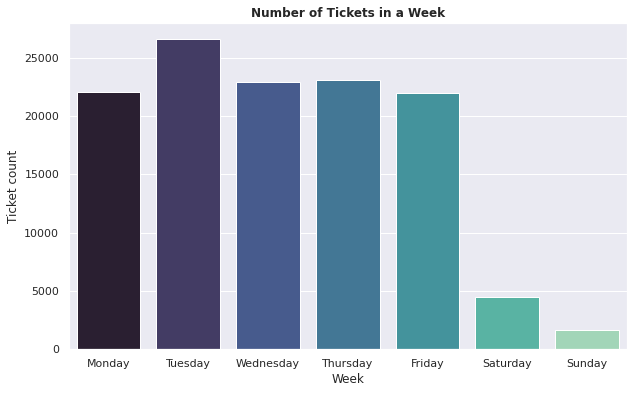

In [283]:
#Ticket count vs Day of the Week

plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='day_of_week', palette='mako')
plt.title('Freqeuncy of Tickets in a Week', fontweight="bold")
plt.xlabel('Week')
plt.ylabel('Number of Tickets')
plt.show()

Tuesday has the highest number of tickets while Sunday has the least.


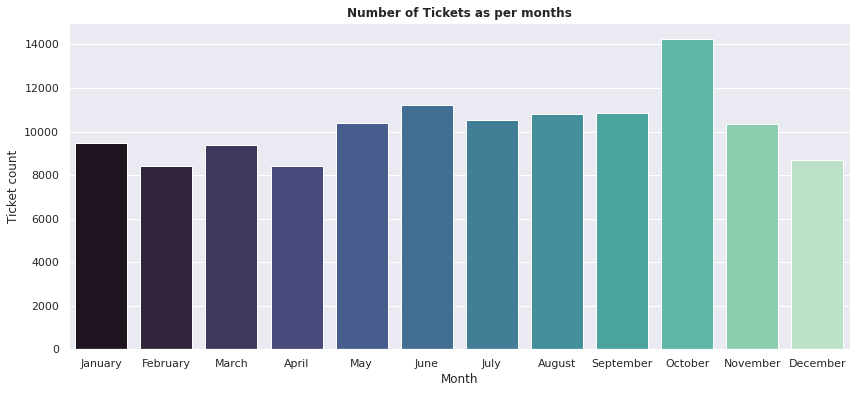

In [282]:
#Ticket count vs Day of the Week

plt.figure(figsize=(14,6))
sns.countplot(data=df1, x='month', palette='mako')
plt.title('Frequency of Tickets per month', fontweight="bold")
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.show()

October has the highest number of tickets while April has the least out of all the months.

In [279]:
df1.year.value_counts()

2022    40014
2021    39580
2020    34248
2019     8924
Name: year, dtype: int64

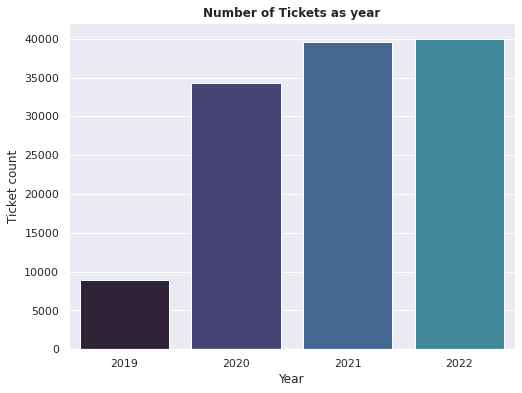

In [286]:
#Ticket count vs Years

plt.figure(figsize=(8,6))
sns.countplot(data=df1, x='year', palette='mako')
plt.title('Frequency of Tickets per year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Tickets')
plt.show()

2022 has the highest number of tickets.

### Tickets as per Goal and Actual Days

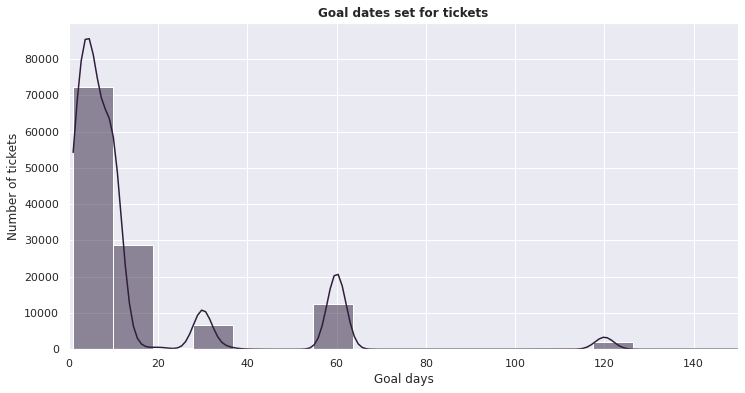

In [382]:
# Tickets vs Goal Days

fig, ax = plt.subplots(figsize =(12, 6))
sns.histplot(df1["goal_days"], bins=20,kde = True, palette='mako')
plt.xlim(0,150)

plt.title("Goal dates set for tickets",fontweight='bold')
plt.xlabel("Goal days")
plt.ylabel("Number of tickets")

plt.show()

Most tickets have goal days set as below 20 days.

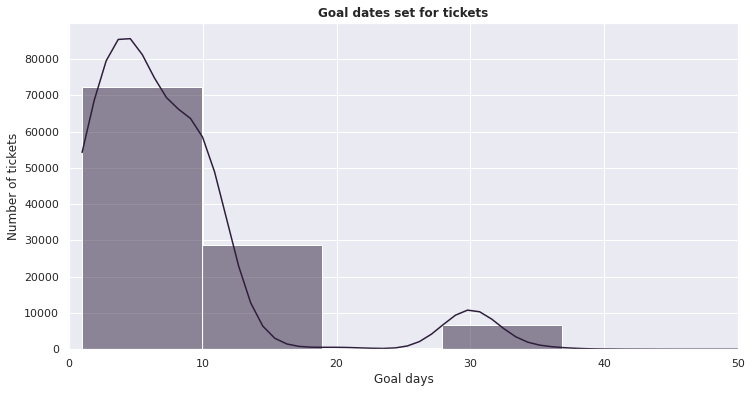

In [381]:
fig, ax = plt.subplots(figsize =(12, 6))
sns.histplot(df1["goal_days"], bins=20,kde = True, palette='mako')
plt.xlim(0,50)

plt.title("Goal dates set for tickets",fontweight='bold')
plt.xlabel("Goal days")
plt.ylabel('Number of tickets')

plt.show()

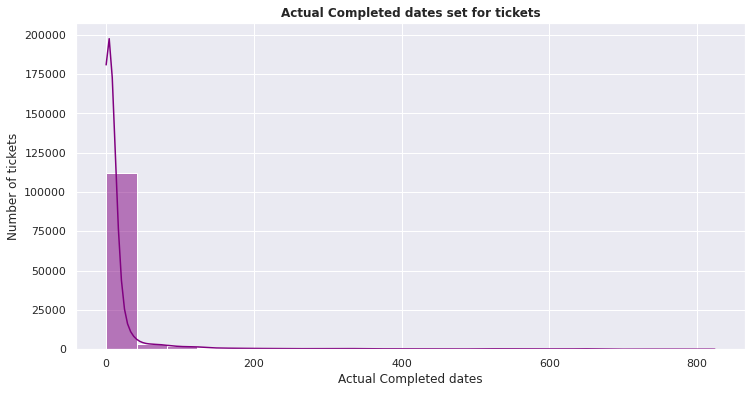

In [380]:
# Tickets vs Actual completed Days

fig, ax = plt.subplots(figsize =(12, 6))
sns.histplot(df1['actual_completed_days'], bins=20, kde = True, color = 'purple', palette='mako')

plt.title('Actual Completed dates set for tickets',fontweight='bold')
plt.xlabel('Actual Completed dates')
plt.ylabel('Number of tickets')

plt.show()

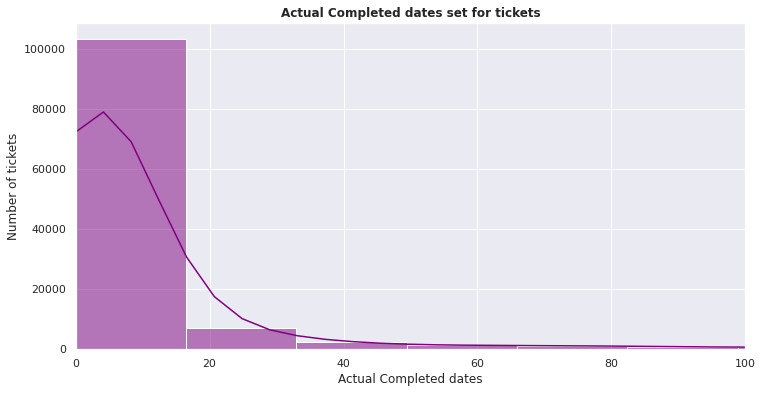

In [378]:
fig, ax = plt.subplots(figsize =(12, 6))
sns.histplot(df1["actual_completed_days"], bins=50, kde = True, color="purple", palette='mako')
plt.xlim(0,100)

plt.title("Actual Completed dates set for tickets",fontweight='bold')
plt.ylabel("Number of tickets")
plt.xlabel("Actual Completed dates")
plt.show()

Most tickets are actually completed under 10 days.

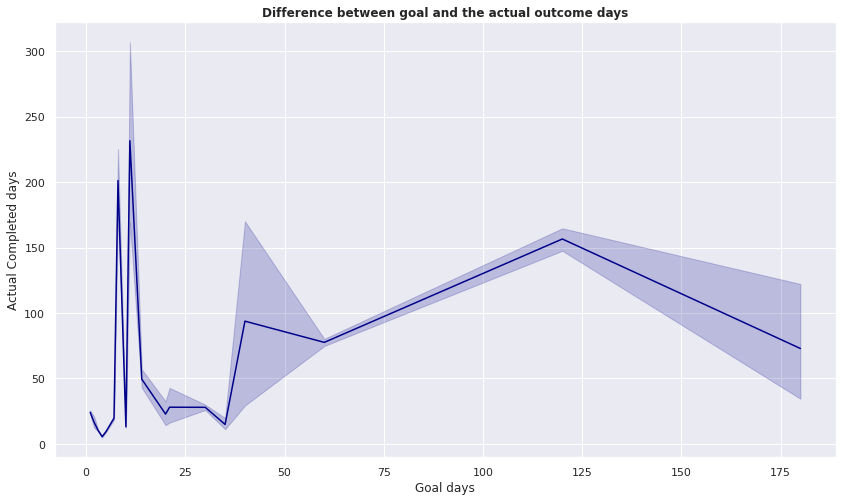

In [383]:
fig, ax = plt.subplots(figsize =(14, 8))
sns.lineplot(data=df1,x="goal_days",y="actual_completed_days", color='darkblue', palette='mako')

plt.title("Difference between goal and the actual outcome days",fontweight='bold')
plt.xlabel("Goal days")
plt.ylabel("Actual Completed days")

plt.show()

## Issue Types

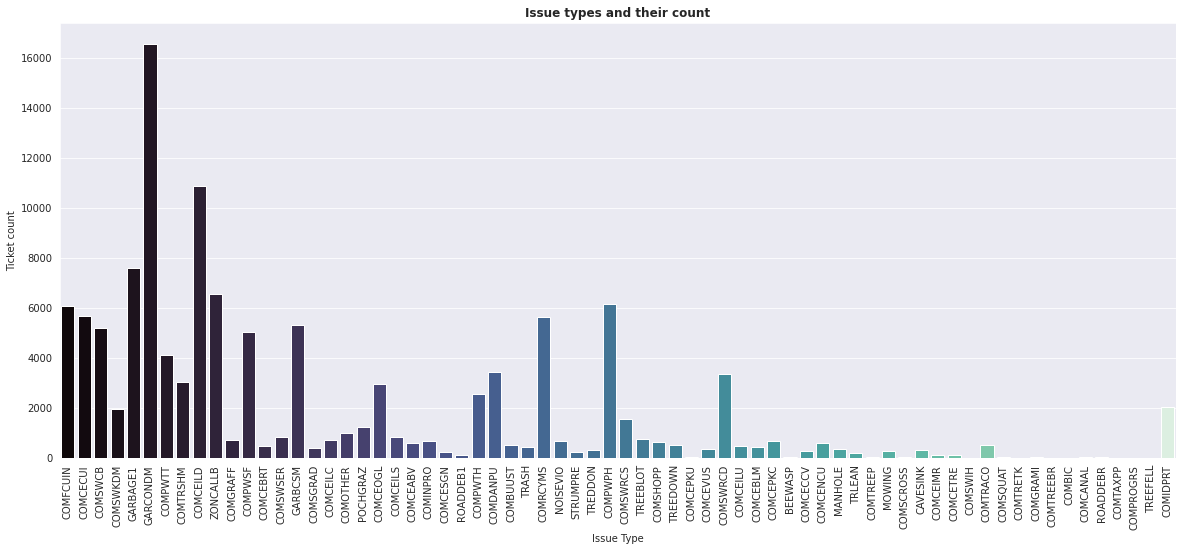

In [222]:
#Tickets vs Issue Type

plt.figure(figsize=(20,8))
sns.countplot(data=df1, x='issue_type', palette='mako')
plt.xticks(rotation='vertical')
plt.title('Issue types and their count', fontweight="bold")
plt.xlabel('Issue Type')
plt.ylabel('Ticket count')
plt.show()

## Case Owners

In [118]:
df1["case_owner"].unique()

array(['Fire-Rescue', 'Code Compliance', 'Solid Waste',
       'Resilience & Public Works', 'Zoning', 'NET', 'Building', 'Police',
       'Innovation & Technology'], dtype=object)

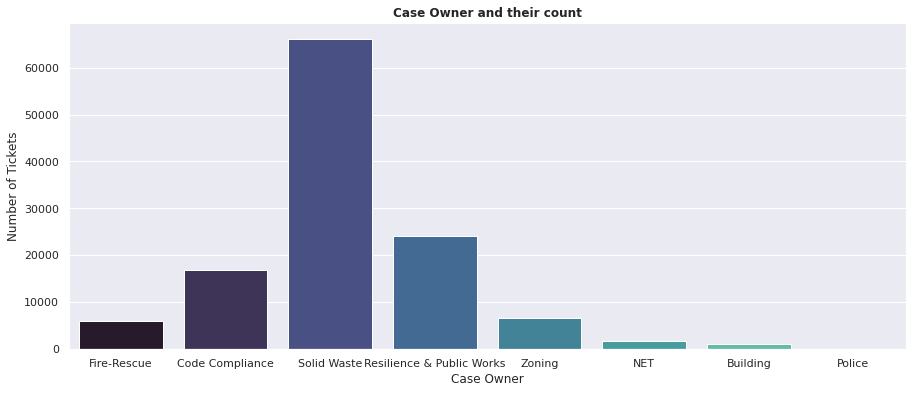

In [377]:
#Tickets vs Case owner

plt.figure(figsize=(15,6))
sns.countplot(data=df1, x='case_owner',palette='mako')
plt.title("Case Owner and their count", fontweight="bold")
plt.xlabel('Case Owner')
plt.ylabel('Number of Tickets')
plt.show()

Issue type - Solid Waste is the most common service request.

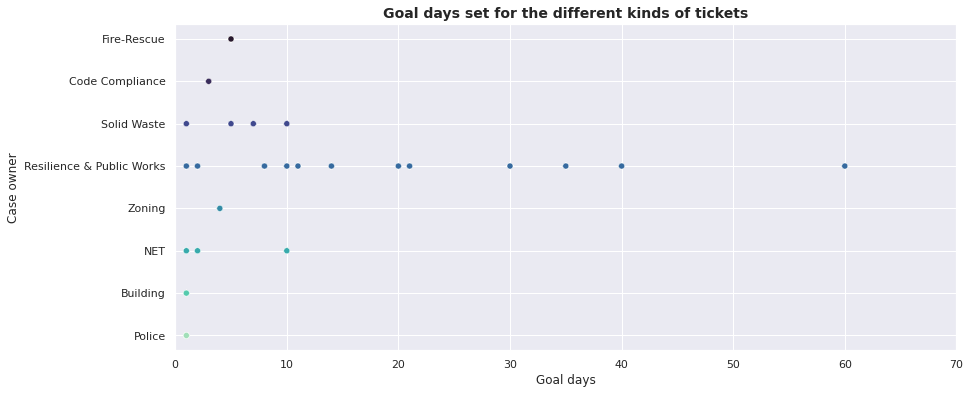

In [376]:
# Case owner vs Goal Days

plt.figure(figsize=(14,6))

sns.scatterplot(data=df1, x="goal_days", y="case_owner", hue="case_owner", legend=False, palette='mako')
plt.xlim(0,70)

plt.title("Goal days set for the different kinds of tickets", fontweight="bold", fontsize=14)
plt.xlabel('Goal days')
plt.ylabel('Case owner')
plt.show()

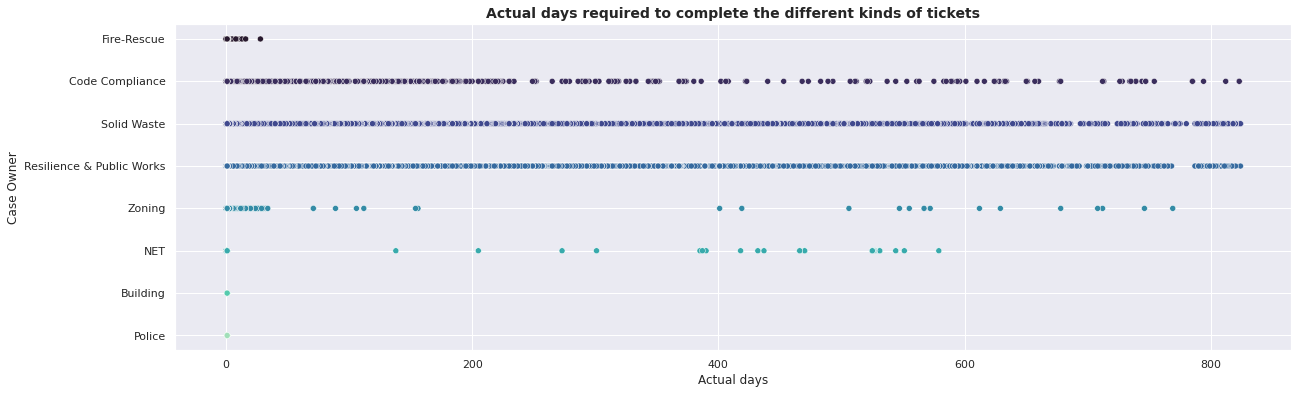

In [375]:
# Case owner vs Actual completed days

plt.figure(figsize=(20,6))

sns.scatterplot(data=df1, x="actual_completed_days", y="case_owner", hue="case_owner", legend=False, palette='mako')

plt.title("Actual days required to complete the different kinds of tickets", fontweight="bold", fontsize=14)
plt.xlabel('Actual days')
plt.ylabel('Case Owner')
plt.show()

<ipython-input-364-24b3368278f8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby("case_owner")["goal_days", "actual_completed_days"].mean().plot(figsize =(14,6))


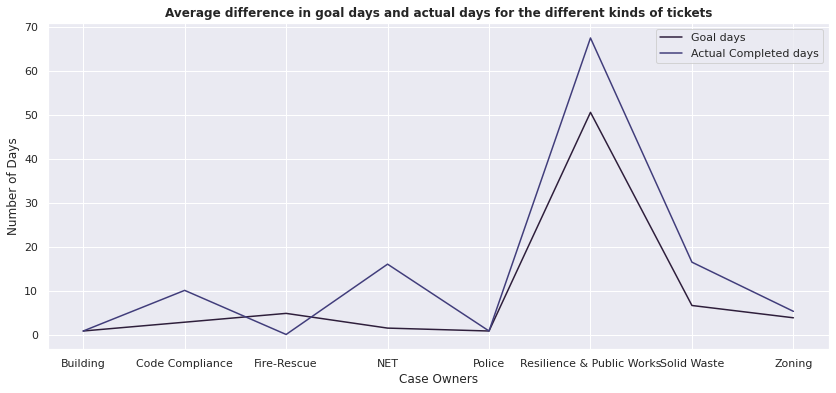

In [364]:
df1.groupby("case_owner")["goal_days", "actual_completed_days"].mean().plot(figsize =(14,6))

plt.xlabel("Case Owners")
plt.ylabel("Number of Days")
plt.legend(["Goal days","Actual Completed days"])
plt.title('Average difference in goal days and actual days for the different kinds of tickets', fontweight='bold')

plt.show()

## Ticket Priority

In [142]:
df1["Ticket_Priority"].value_counts()

STANDARD    113676
URGENT        8539
COMMSNR       2950
EMERGNCY      2131
MAYOR           12
MH              11
HURRACT          7
Name: Ticket_Priority, dtype: int64

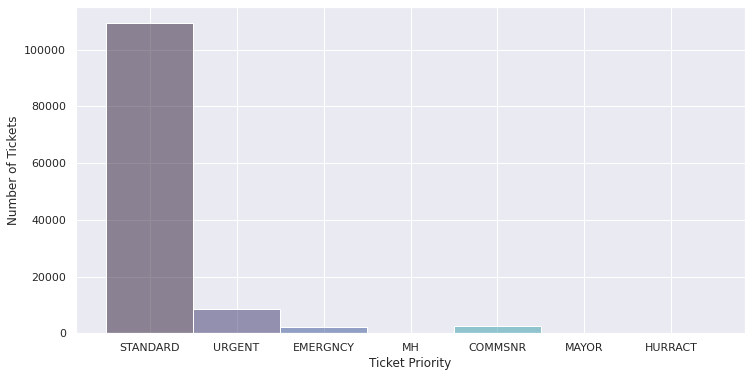

In [374]:
# Tickets vs Priority

fig, ax = plt.subplots(figsize =(12, 6))

sns.histplot(data=df1, x="Ticket_Priority", hue="Ticket_Priority", legend=False, palette='mako')
plt.xlabel("Ticket Priority")
plt.ylabel('Number of Tickets')

plt.show()

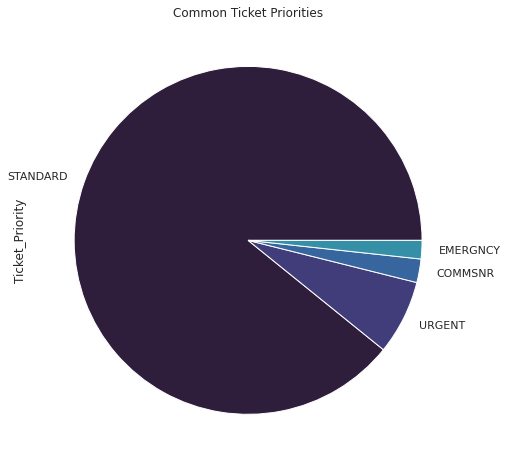

In [372]:
df1['Ticket_Priority'].value_counts().head(4).plot.pie(title='Common Ticket Priorities', figsize=(8,8))

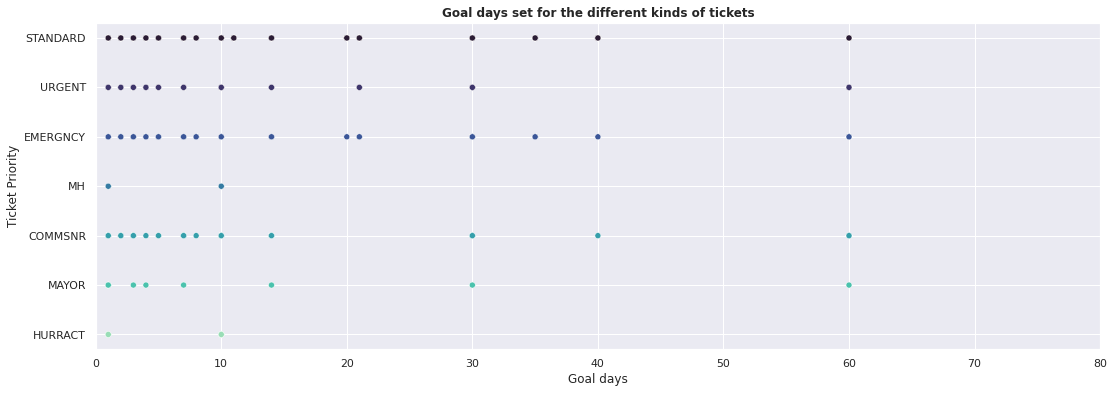

In [371]:
#Priority vs Goal Days

plt.figure(figsize=(18,6))

sns.scatterplot(data=df1, x="goal_days", y="Ticket_Priority", hue="Ticket_Priority", legend=False, palette='mako')
plt.xlim(0,80)

plt.title('Goal days set for the different kinds of tickets', fontweight='bold')
plt.xlabel('Goal days')
plt.ylabel('Ticket Priority')
plt.show()


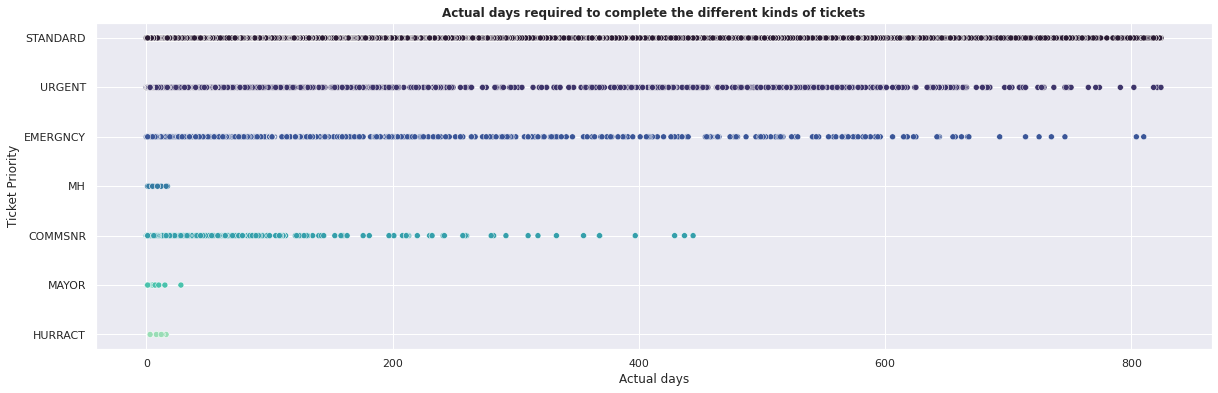

In [370]:
# Priority vs Actual completed days 

plt.figure(figsize=(20,6))

sns.scatterplot(data=df1, x="actual_completed_days", y="Ticket_Priority", hue="Ticket_Priority", legend=False, palette='mako')

plt.title('Actual days required to complete the different kinds of tickets', fontweight='bold')
plt.xlabel('Actual days')
plt.ylabel('Ticket Priority')
plt.show()

<ipython-input-369-4e9c70b8ff25>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby("Ticket_Priority")["goal_days", "actual_completed_days"].mean().plot(figsize =(14,6))


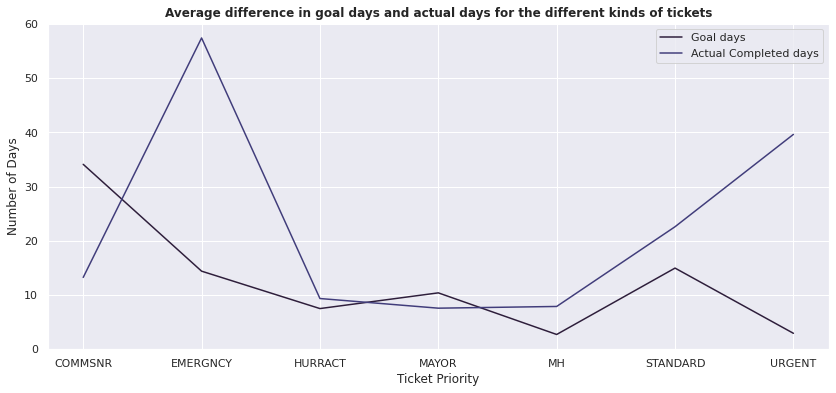

In [369]:
df1.groupby("Ticket_Priority")["goal_days", "actual_completed_days"].mean().plot(figsize =(14,6))
plt.xlabel("Ticket Priority")
plt.ylabel("Number of Days")

plt.legend(["Goal days","Actual Completed days"])

plt.title('Average difference in goal days and actual days for the different kinds of tickets', fontweight='bold')

plt.show()

## Methods

In [304]:
df1['method_received'].value_counts()

PHONE          105788
IPHONE           7703
WEB              4426
EMAIL            1957
ANDROID          1598
PROACT            982
SOCIALMEDIA        88
WALKIN             86
APPEOCA            59
INHOUSE            44
MAIL                9
MAYOFF              8
OTHER               7
POLICELSN           6
COMMMEET            2
FAX                 2
XTERFACE            1
Name: method_received, dtype: int64

So the most common method through which the tickets have been received are by phone. Although - the data also mentions "Iphone" and "Android" seperately. I'm assuming some people were trying to be more specific in terms of their phone. Which still eans that phone was the most preferred method.

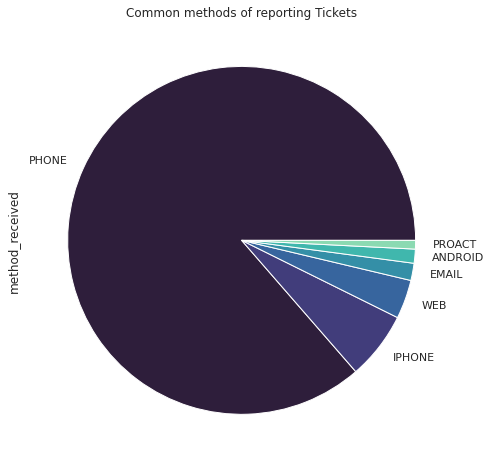

In [368]:
# Types of common methods to report tickets

df1['method_received'].value_counts().head(6).plot.pie(title="Common methods of reporting Tickets", figsize=(8, 8))